# 5.2 Building on top of `matplotlib`

## Read in Datasets

1. WAS 2020 Data
2. Subset of an AVIRIS image

In [1]:
import pandas as pd
import rasterio

In [2]:
# Import example WAS data
was_2020_filepath = "./data/SARP 2020 final.xlsx"
was_2020 = pd.read_excel(was_2020_filepath, "INPUT", skipfooter=7)

In [3]:
# Import example AVIRIS data
with rasterio.open('./data/subset_f180628t01p00r02_corr_v1k1_img') as src:
    metadata = src.meta
    bands = src.read()

## Accessing the `matplotlib` in `pandas`

pandas' [plotting tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html#).  Useful for reference or for skimming to see more of what the library can do.

In [4]:
# Processing the dataframe
flagstaff_co = was_2020[was_2020['Location'] == 'Mars Hill/Lowell Observatory, Flagstaff, Arizona'][['Date', 'CO (ppbv)', 'CH4 (ppmv height)']]
flagstaff_co = flagstaff_co.set_index('Date')

Text(0.5, 1.0, 'CO over time for Flagstaff, AZ')

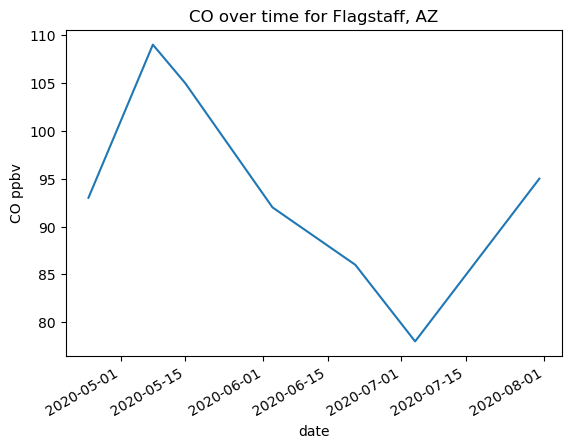

In [5]:
# Making the plot
# !! Notice that DATAFRAME.plot() returns an axes object !!
ax = flagstaff_co['CO (ppbv)'].plot(xlabel='date', ylabel='CO ppbv')
ax.set_title('CO over time for Flagstaff, AZ')

In [6]:
import matplotlib.pyplot as plt

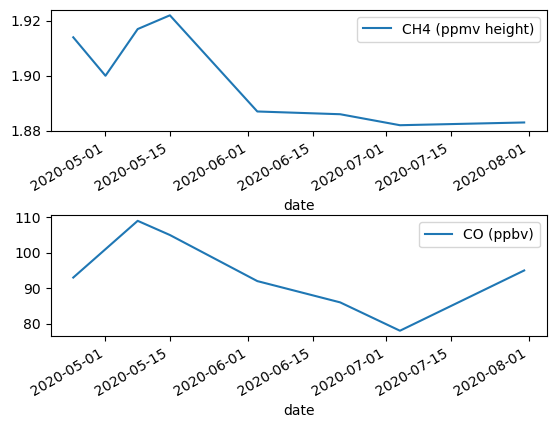

In [7]:
# We can set our pandas dataframe inside a subplot created with matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1)
flagstaff_co.plot(y='CH4 (ppmv height)', ax=ax1, xlabel='date')
flagstaff_co.plot(y='CO (ppbv)', ax=ax2, xlabel='date')
fig.subplots_adjust(hspace=0.7)  # Add more space between plots for labels

[`.fig.subplots_adjust()` inputs](https://stackoverflow.com/a/6541482/9081082)

### Scatter plot example

In [8]:
import numpy as np

In [9]:
# Prepare the data
was_2020[(was_2020['n-Butane (E/B)'] < 0) | (was_2020['n-Butane (E/B)'] > 1000)]  = np.nan
was_2020[(was_2020['i-Butane (E/B)'] < 0) | (was_2020['i-Butane (E/B)'] > 1000)]  = np.nan

`alpha` sets the **opacity** of the points, meaning that it dictates how much you can see through them.  I like using it on scatter plots becuase it helps see better the density of points when they are overlapping.

Text(0.5, 1.0, 'Butane ratios')

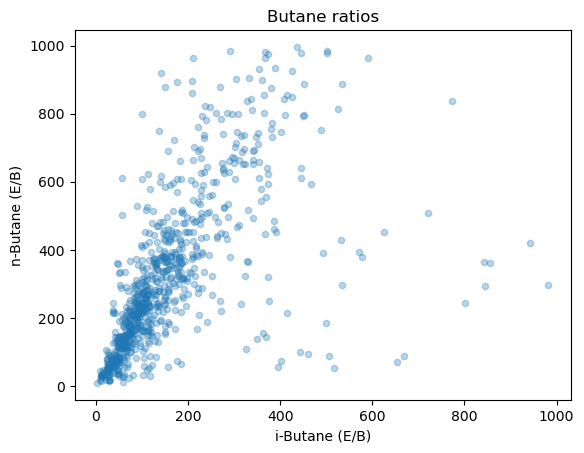

In [10]:
was_2020.plot.scatter(x='i-Butane (E/B)', y='n-Butane (E/B)', alpha=0.3)
plt.title('Butane ratios')

## `seaborn`
### Trading control for ease

`matplotlib` really lets you do most anything you can imagine to plots.  While the control is nice you don't always need it.  If instead you are interested in making plots faster, you might use the library `seaborn`.

Note: `seaborn` is most useful if you are using data in a pandas dataframe.  Creating plots from seaborn for numpy matrices is totally fine, but you don't get the same level of benefit as you do with column labelled pandas data.

### Installation

`conda install -c conda-forge -n lessons seaborn --yes`

**Feature:** known for built in statistics support

### Links

* Nice tutorial section, seperated by need: https://seaborn.pydata.org/tutorial.html
* Example gallery also great for inspiration: https://seaborn.pydata.org/examples/index.html
* A list of plot types based on data: https://seaborn.pydata.org/api.html#api-reference

In [11]:
import seaborn as sns

In [12]:
sns.set_theme()

### Example with a pandas dataframe

* `relplot` [docs page](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [13]:
# Organizing the dataframe
was_2020_subset = was_2020[(was_2020['Weather'] == 'Cloudy') | (was_2020['Weather'] == 'clear')]

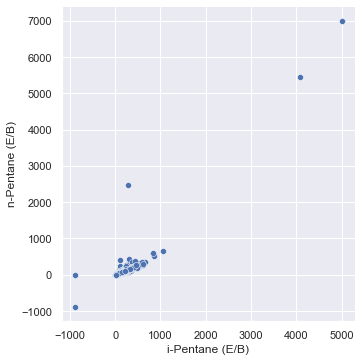

In [14]:
# Plotting with axis labels in one line
sns.relplot(data=was_2020_subset, x='i-Pentane (E/B)', y='n-Pentane (E/B)')

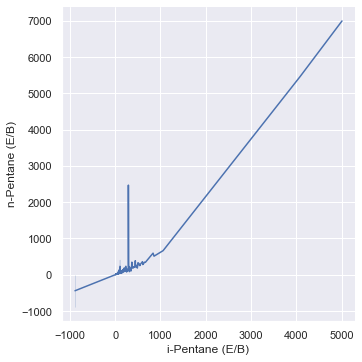

In [15]:
# A line plot version
sns.relplot(data=was_2020_subset, x='i-Pentane (E/B)', y='n-Pentane (E/B)', kind='line')

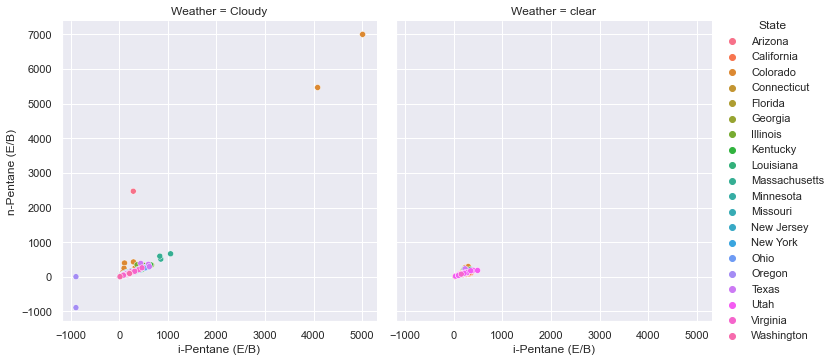

In [16]:
# Adding colors, sizes, and comparison graphs based on additional columns of the dataframe
sns.relplot(data=was_2020_subset, x='i-Pentane (E/B)', y='n-Pentane (E/B)', hue='State',
           col='Weather')

### Example with numpy arrays
You can use `seaborn` with matrix data but in the case of numpy arrays you don't get quite as much benefit.  The colors and styles are nice but you don't get the axis lables with just a matrix of data.

* `relplot` [docs page](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [17]:
band_100_135 = bands[:, 100, 135]
band_200_330 = bands[:, 200, 330]

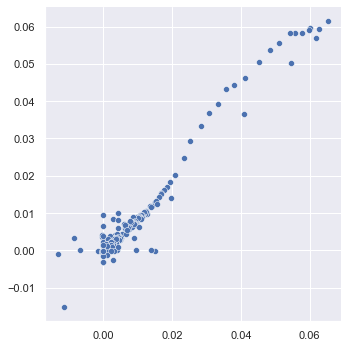

In [18]:
sns.relplot(x=band_100_135, y=band_200_330)

### Customizing
Because seaborn is built on top of matplotlib, you can still choose to customize the plots with the same commands as matplotlib.

(0.0, 850.0)

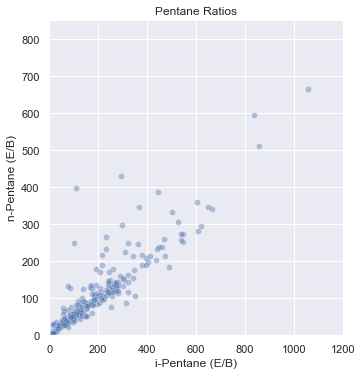

In [20]:
sns.relplot(data=was_2020_subset, x='i-Pentane (E/B)', y='n-Pentane (E/B)', alpha=0.4)
plt.title('Pentane Ratios')
plt.xlim(0, 1200) # change the x axis range
plt.ylim(0,850)  # change the y axis range